In [37]:
import os
import numpy as np
import pandas as pd

rr_data =[]
for fn in sorted(os.listdir('./rr')):
    rr = open('./rr/' + fn).read()
    rr = map(float, rr.split('\n')[:-1])
    rr = np.array(rr)
    rr_data.append(rr)

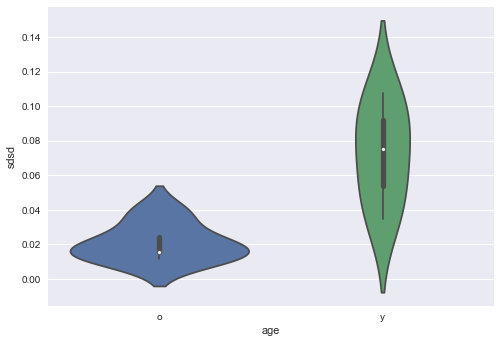

       adnn age      sdsd
0  1.011468   o  0.015541
1  1.061764   o  0.015358
2  1.003598   o  0.024428
3  1.165764   o  0.038269
4  1.087857   o  0.011445
5  0.829640   y  0.091829
6  1.028231   y  0.074860
7  0.951675   y  0.034481
8  1.312796   y  0.107332
9  1.047010   y  0.053479


In [50]:
import seaborn as sn
import pandas as pd

def compute_sdsd(rr):
    return np.std(rr[:-1] - rr[1:])

sdsd = map(compute_sdsd, rr_data)

adnn = map(np.mean, rr_data)
df = pd.DataFrame(data = adnn, columns =['adnn'])
df = df.assign(age = ['o','o','o','o','o','y','y','y','y','y'])
#sn.violinplot(data = df, y = 'adnn', x = 'age')
df = df.assign(sdsd = sdsd)
#sdnn = map(np.std, rr_data)
#SDNN = pd.DataFrame(data = sdnn, columns=['SDNN'])
#SDNN = SDNN.assign(age = ['o','o','o','o','o','y','y','y','y','y'])

sn.violinplot(data = df, y = 'sdsd', x = 'age')

plt.show()
print df

0.06704734512512846
0.010989396960782376


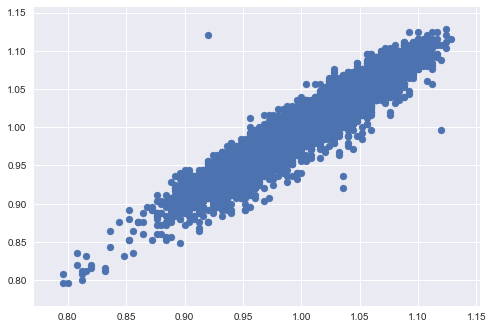

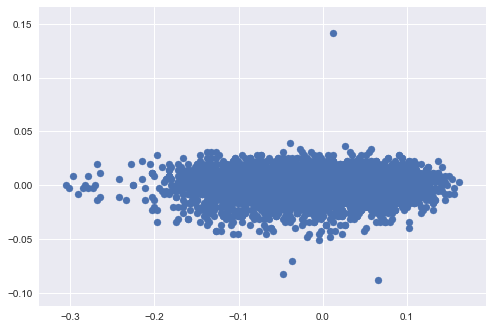

In [69]:


rr = rr_data[0]
P = np.vstack([rr[:-1],rr[1:]])
X, Y = P
plt.figure();plt.scatter(X, Y)
r45 = np.deg2rad(-45)
R_45 = np.array([[np.cos(r45), -np.sin(r45)], [np.sin(r45), np.cos(r45)]])

P = P.T - P.mean(axis = 1)
P = np.array(map(R_45.dot, P))
X, Y = P.T

print np.std(X)
print np.std(Y)
plt.figure();plt.scatter(X, Y)
plt.show()

In [80]:
from scipy import optimize
def cost (u):
    A,B,C,D,E,F = u
    x, y = P.T
    err = A*x**2 + B*x*y + C*y**2 + D*x + E*y +F
    return np.mean(err**2)

print optimize.fmin(cost, x0 = np.array([1., 1. , 1. , 1., 1., 1.]))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 712
         Function evaluations: 1111
[ 1.67254953e-03  3.84621916e-02 -3.17245610e-01 -3.32061378e-05
 -8.78502303e-04  3.07278068e-05]


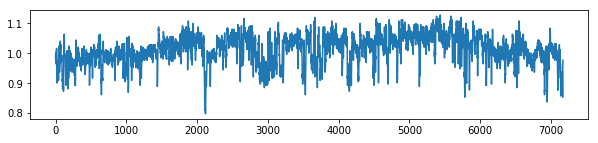

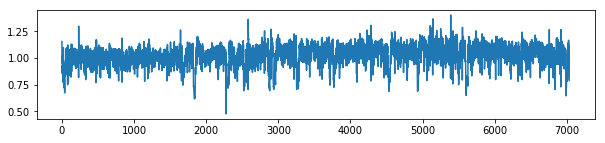

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
plt.plot(rr_data[0])
plt.figure(figsize=(10,2))
plt.plot(rr_data[6])

plt.show()